<a href="https://colab.research.google.com/github/urbnzazo25/MLDL22-23/blob/main/Lab1/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [ ]:
# !git clone https://github.com/urbnzazo25/MLDL22-23.git

In [30]:
import sklearn
from sklearn.datasets import load_digits, load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
X[0].shape

In [ ]:
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, shuffle=True, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
regressor = LogisticRegression(solver='lbfgs')
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [ ]:
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F1 score: {f1}")

### Ex 1

In [ ]:
iris = load_iris()
#X = iris.data
y1 = iris.target

In [ ]:
print(y)

In [ ]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
X1 = scaler.fit_transform(X)
cov = np.cov(X1, rowvar=False)

In [ ]:
w, v = np.linalg.eig(cov)

In [ ]:
idx = np.argsort(w)[::-1]

In [ ]:
v = v[:, idx]

In [ ]:
X_pca = X1 @ v[:, [i for i in range(0, 15)]]

In [ ]:
np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()

for name, label in [(str(i), i) for i in range(0, 10)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y1, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

### Ex 2

In [18]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...


In [27]:
import sys
sys.path.append(r'fashion-mnist\utils')
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

In [100]:
n = 6
scaler = MaxAbsScaler()
X_t = scaler.fit_transform(X_train)
X_t = PCA(n_components=n).fit_transform(X_t)

In [101]:
idx = np.where(y_train == 0)[0]

In [102]:
X_t, y_t = X_t[idx, :], y_train[idx]

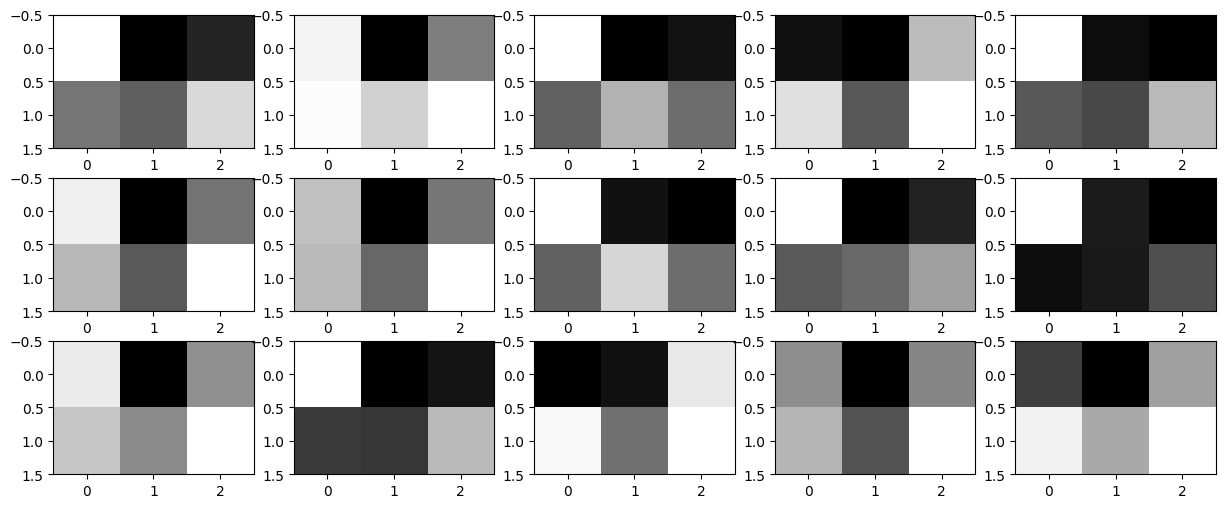

In [103]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
sample = X_t[np.random.choice(X_t.shape[0], 15, replace=False), :]
for i, ax in enumerate(axs.flat):
    ax.imshow(sample[i,:].reshape(2, 3), cmap='gray')

##### Now last six eigenvalues

In [104]:
X_t = scaler.fit_transform(X_train)

In [105]:
cov = np.cov(X_t, rowvar=False)
w, v = np.linalg.eig(cov)

In [107]:
idx = np.argsort(w)
v = v[:, idx]

In [108]:
X_pca = X_t @ v[:, [i for i in range(0, 6)]]

In [109]:
idx0 = np.where(y_train == 0)[0]

In [110]:
X_pca, y_t = X_pca[idx0, :], y_train[idx0]

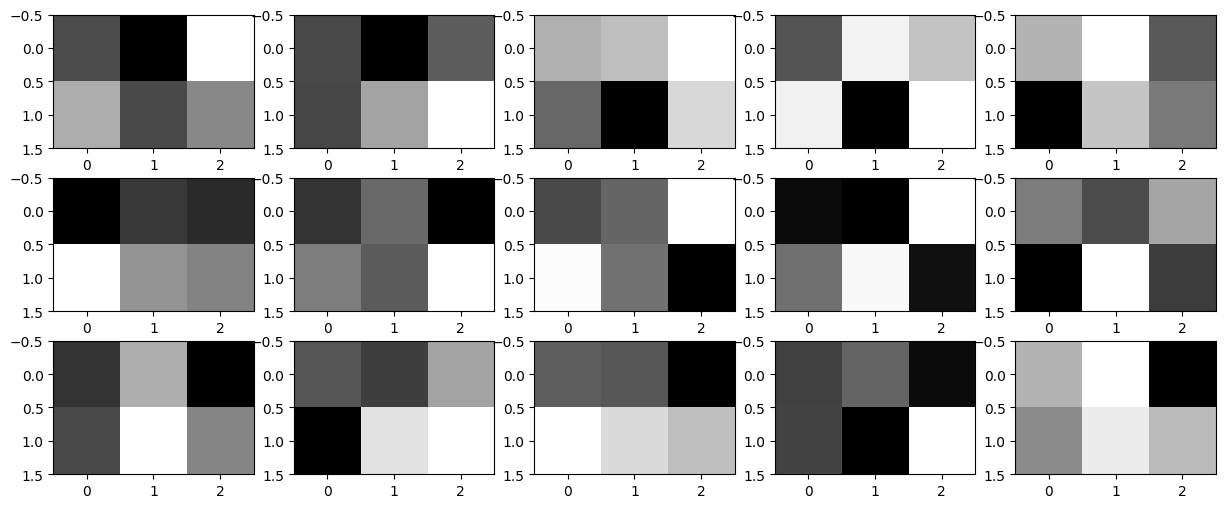

In [111]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 6))
sample = X_pca[np.random.choice(X_pca.shape[0], 15, replace=False), :]
for i, ax in enumerate(axs.flat):
    ax.imshow(sample[i,:].reshape(2, 3), cmap='gray')

In [128]:
import torch
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)
y.sub_(x)
print(y)
z = x.reshape(4, -1)
z

tensor([[0.6125, 0.1865],
        [0.3309, 0.6173]])
tensor([[0.4927, 0.2172],
        [0.9999, 0.3459]])
tensor([[-0.1198,  0.0307],
        [ 0.6690, -0.2715]])


tensor([[0.6125],
        [0.1865],
        [0.3309],
        [0.6173]])

In [129]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
